# 02 Deskriptive Statistik & Visualisierung
----------------------------------------------------------------------------------------------

# 0. Überblick und Setup
In diesem Notebook gehen wir auf das Vorlesungskapitel 2 mit den Inhalten **Lage + Streuung + Verteilungsform** ein.

In [1]:
import sys
from pathlib import Path

ROOT = Path.cwd().parent          # eine Ebene über notebooks/
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, median_abs_deviation
from src.utils_stats import iqr, trimmed_mean, tukey_fences, tukey_outliers, modified_z_score, ecdf, z_score, create_na_table
from src.utils_plots import hist_kde, box_violin, plot_ecdf, hist_with_fences, plot_qq


PATH = "../data/Taxi_final_1M.csv"
df = pd.read_csv(PATH)

print(200*"=")
print(f"Datensatz geladen: {df.shape[0]:,} Zeilen, {df.shape[1]} Spalten")
print(200*"-")
print("Erste Zeilen:")
display(df.head(5))
print(200*"-")
print("Describe:")
display(df.describe())
print(200*"-")
print("Info:")
display(df.info())
print(200*"=")

Projekt-Root hinzugefügt: /Users/lukas/Library/CloudStorage/OneDrive-UniversitaetSt.Gallen/3. Semester/Statistics for Data Science/Statistic-Data-Sience-Project
Datensatz geladen: 999,997 Zeilen, 17 Spalten
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Erste Zeilen:


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,average_speed
0,2023-02-06 18:31:28,2023-02-06 18:41:28,1.0,2.8,162,113,1,11.4,2.5,2.00,0.0,1.0,19.90,2.5,0.0,10.0,17.0
1,2023-01-13 12:22:41,2023-01-13 12:54:42,1.0,0.0,76,61,1,22.0,0.0,0.00,0.0,1.0,23.50,0.0,0.0,32.0,0.0
2,2023-01-24 12:53:51,2023-01-24 13:06:09,5.0,2.3,142,48,2,12.1,0.0,0.00,0.0,1.0,16.10,2.5,0.0,12.3,11.2
3,2023-02-04 22:58:49,2023-02-04 23:03:11,2.0,1.1,107,107,1,5.8,3.5,1.20,0.0,1.0,12.00,2.5,0.0,4.4,15.5
4,2023-02-02 16:39:15,2023-02-02 16:50:39,1.0,2.9,234,249,1,12.1,2.5,3.72,0.0,1.0,22.32,2.5,0.0,11.4,15.5


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Describe:


,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,average_speed
count,965589.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,965589.000000,965589.000000,999997.000000,999677.0
mean,1.371431,6.379764,165.114067,164.009744,1.185203,19.461998,1.553423,3.514121,0.585813,0.979089,28.386058,2.263851,0.139958,17.447879,inf
std,0.894295,218.072658,63.987243,69.768903,0.557130,19.002883,1.841943,4.122940,2.185004,0.200862,23.687311,0.799050,0.468547,40.936206,NaN
min,0.000000,0.000000,1.000000,1.000000,0.000000,-900.000000,-7.500000,-70.000000,-36.050000,-1.000000,-901.000000,-2.500000,-1.750000,-52.200000,-65178.3
25%,1.000000,1.700000,132.000000,114.000000,1.000000,9.300000,0.000000,1.000000,0.000000,1.000000,15.950000,2.500000,0.000000,7.600000,11.3
50%,1.000000,2.900000,162.000000,162.000000,1.000000,13.500000,1.000000,2.800000,0.000000,1.000000,21.000000,2.500000,0.000000,12.600000,15.4
75%,1.000000,5.500000,234.000000,234.000000,1.000000,21.900000,2.500000,4.400000,0.000000,1.000000,30.720000,2.500000,0.000000,20.700000,21.4
max,8.000000,148560.100000,265.000000,265.000000,4.000000,2449.500000,14.250000,700.000000,85.000000,1.000000,2451.000000,2.500000,1.750000,3713.800000,inf


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tpep_pickup_datetime   999997 non-null  object 
 1   tpep_dropoff_datetime  999997 non-null  object 
 2   passenger_count        965589 non-null  float64
 3   trip_distance          999997 non-null  float64
 4   PULocationID           999997 non-null  int64  
 5   DOLocationID           999997 non-null  int64  
 6   payment_type           999997 non-null  int64  
 7   fare_amount            999997 non-null  float64
 8   extra                  999997 non-null  float64
 9   tip_amount             999997 non-null  float64
 10  tolls_amount           999997 non-null  f

None

# 1. Lagekennzahlen

In [2]:
num_cols = df.select_dtypes(include="number")
lagekennzahlen_df = pd.DataFrame({
    "n": num_cols.count(),
    "Mean": num_cols.mean(),
    "Median": num_cols.median(),
    "Modus": num_cols.apply(lambda s: ", ".join(map(str, s.mode().tolist()))), # Wenn es mehrere Modi gibt diese als comma-separated Liste anzeigen
    "Trimmed Mean with 10%": num_cols.apply(lambda x: trimmed_mean(x)),
    "Min": num_cols.min(), 
    "Q1": num_cols.quantile(0.25),
    "Q3": num_cols.quantile(0.75),
    "Max": num_cols.max() 

})
format = {
    c: "{:.2f}"
    for c in lagekennzahlen_df.columns
    if pd.api.types.is_numeric_dtype(lagekennzahlen_df[c])
}

print(115*"=")
print("Überblick über fehlende Werte nach Spalte:")
display(create_na_table(num_cols))
print("\n")

print(115*"-")
print("Überblick über Lagekennzahlen nach Spalte:")
display(lagekennzahlen_df.style.format(format))
print(115*"=")

Überblick über fehlende Werte nach Spalte:


,column,n_missing,percent_missing
0,passenger_count,34408,3.4
1,trip_distance,0,0.0
2,PULocationID,0,0.0
3,DOLocationID,0,0.0
4,payment_type,0,0.0
5,fare_amount,0,0.0
6,extra,0,0.0
7,tip_amount,0,0.0
8,tolls_amount,0,0.0
9,improvement_surcharge,0,0.0




-------------------------------------------------------------------------------------------------------------------
Überblick über Lagekennzahlen nach Spalte:


,n,Mean,Median,Modus,Trimmed Mean with 10%,Min,Q1,Q3,Max
passenger_count,965589.00,1.37,1.00,1.0,1.17,0.00,1.00,1.00,8.00
trip_distance,999997.00,6.38,2.90,1.4,3.80,0.00,1.70,5.50,148560.10
PULocationID,999997.00,165.11,162.00,132,168.50,1.00,132.00,234.00,265.00
DOLocationID,999997.00,164.01,162.00,236,168.33,1.00,114.00,234.00,265.00
payment_type,999997.00,1.19,1.00,1,1.11,0.00,1.00,1.00,4.00
fare_amount,999997.00,19.46,13.50,9.3,15.89,-900.00,9.30,21.90,2449.50
extra,999997.00,1.55,1.00,0.0,1.25,-7.50,0.00,2.50,14.25
tip_amount,999997.00,3.51,2.80,0.0,2.76,-70.00,1.00,4.40,700.00
tolls_amount,999997.00,0.59,0.00,0.0,0.00,-36.05,0.00,0.00,85.00
improvement_surcharge,999997.00,0.98,1.00,1.0,1.00,-1.00,1.00,1.00,1.00


# 2. Streuungskennzahlen

In [3]:
# Klassische & robuste Streuungskennzahlen
streuungskennzahlen_df = pd.DataFrame({
    "SD": num_cols.std(),
    "Var": num_cols.var(),
    "IQR": num_cols.quantile(0.75) - num_cols.quantile(0.25),
    "MAD": num_cols.apply(lambda x: median_abs_deviation(x)),
    "Range": num_cols.max() - num_cols.min()
})
print(70*"=")
display(streuungskennzahlen_df.style.format("{:,.2f}"))
print(70*"=")

,SD,Var,IQR,MAD,Range
passenger_count,0.89,0.80,0.00,nan,8.00
trip_distance,218.07,"47,555.68",3.80,1.50,"148,560.10"
PULocationID,63.99,"4,094.37",102.00,62.00,264.00
DOLocationID,69.77,"4,867.70",120.00,68.00,264.00
payment_type,0.56,0.31,0.00,0.00,4.00
fare_amount,19.00,361.11,12.60,5.60,"3,349.50"
extra,1.84,3.39,2.50,1.00,21.75
tip_amount,4.12,17.00,3.40,1.80,770.00
tolls_amount,2.19,4.77,0.00,0.00,121.05
improvement_surcharge,0.20,0.04,0.00,0.00,2.00


# 3. Ausreißer erkennen (Diagnose)

In [4]:
def create_outlier_table(df):
    results = []

    for col in num_cols.columns:
        s = num_cols[col].astype(float)

        z_mask = z_score(s)

        modz_mask = modified_z_score(s)
        tukey_mask = tukey_outliers(s)

        results.append({
            "Spalte": col,
            "Z-Score": int(z_mask.sum()),
            "Modified Z-Score": int(modz_mask.sum()),
            "Tukey IQR": int(tukey_mask.sum())
        })

    outlier_table = pd.DataFrame(results).set_index("Spalte")
    display(outlier_table)

create_outlier_table(num_cols)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,Z-Score,Modified Z-Score,Tukey IQR
Spalte,,,
passenger_count,21021,0,240076
trip_distance,24,136426,130715
PULocationID,0,0,0
DOLocationID,0,0,0
payment_type,19319,0,221690
fare_amount,12118,101557,108910
extra,16991,18729,18294
tip_amount,25905,47659,76499
tolls_amount,6187,0,81129


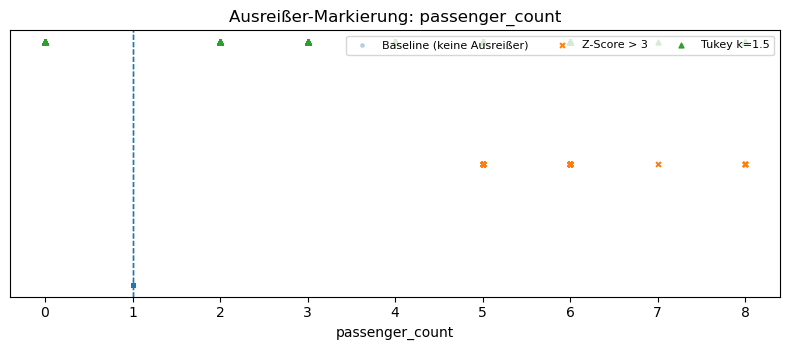

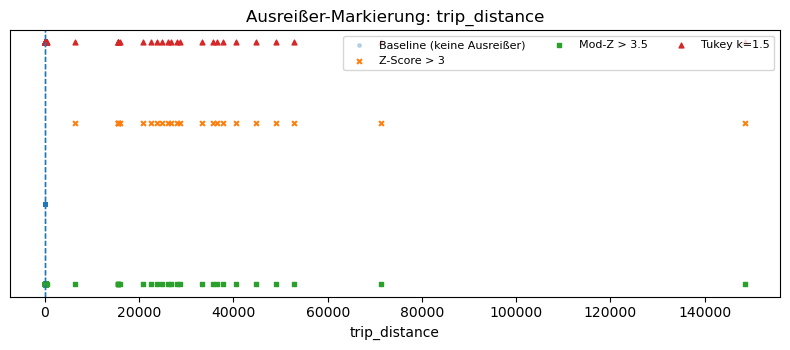

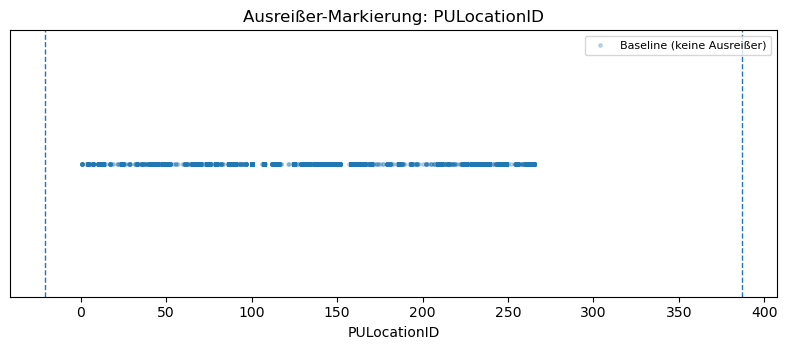

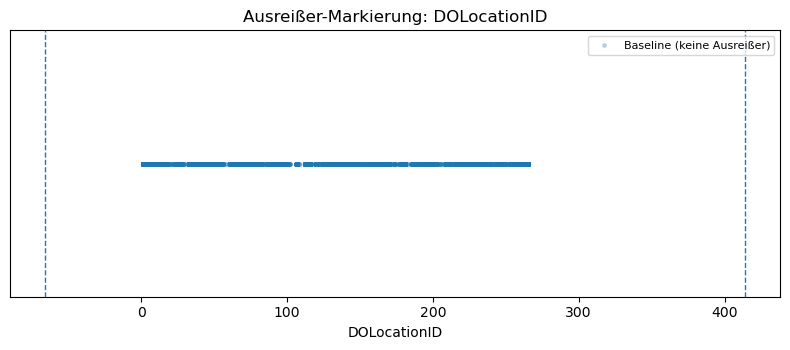

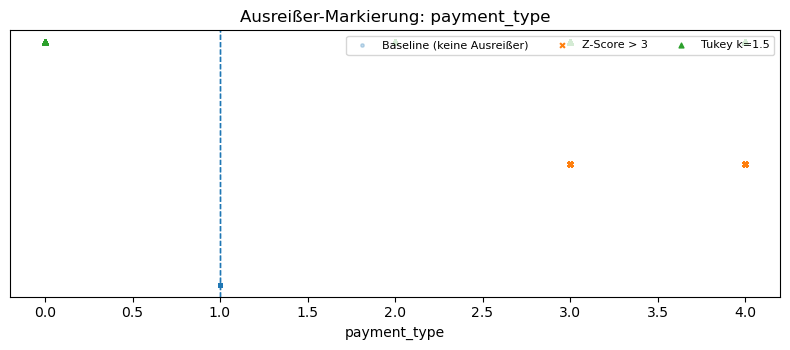

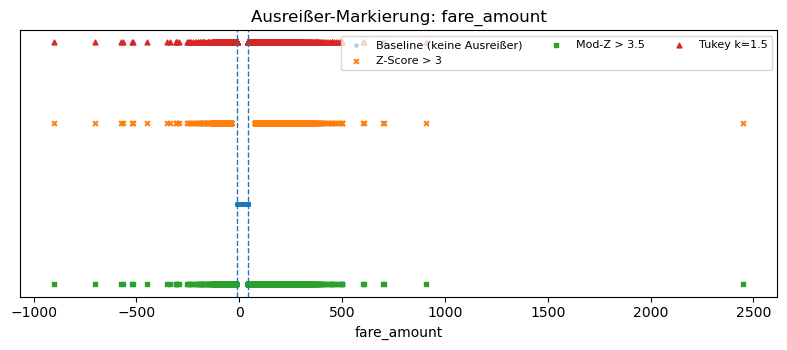

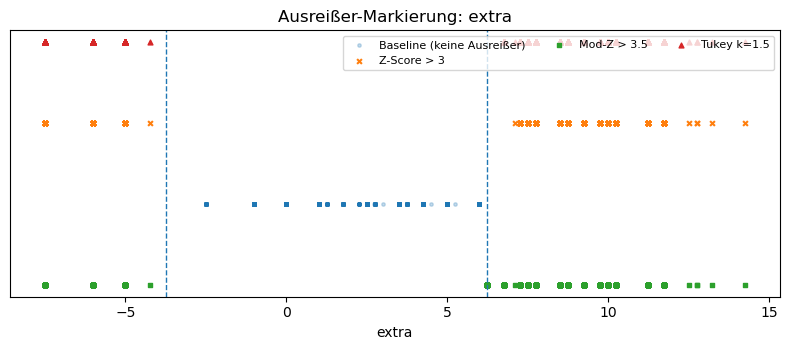

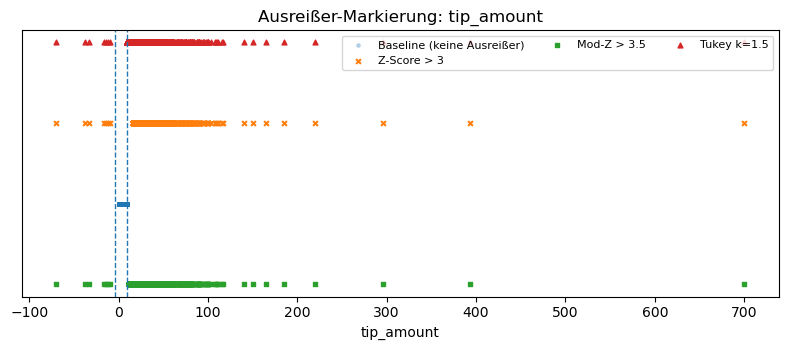

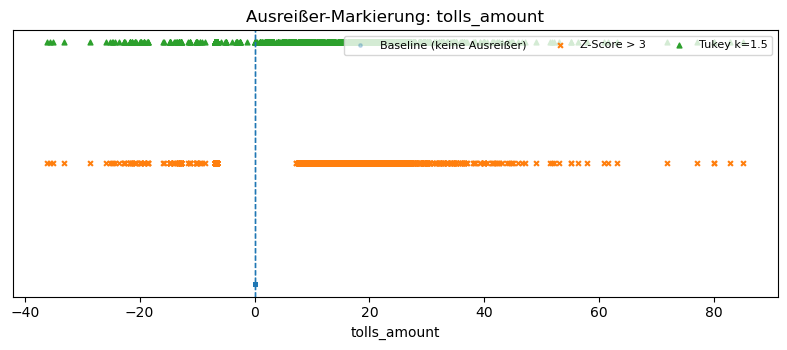

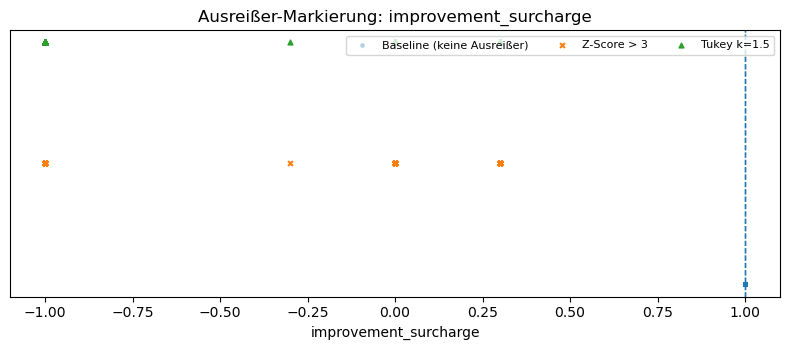

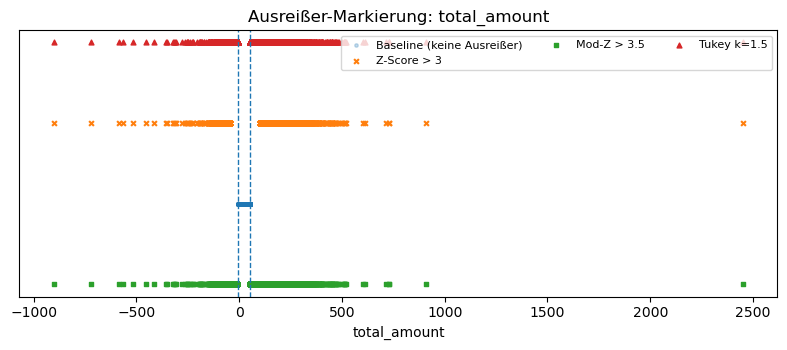

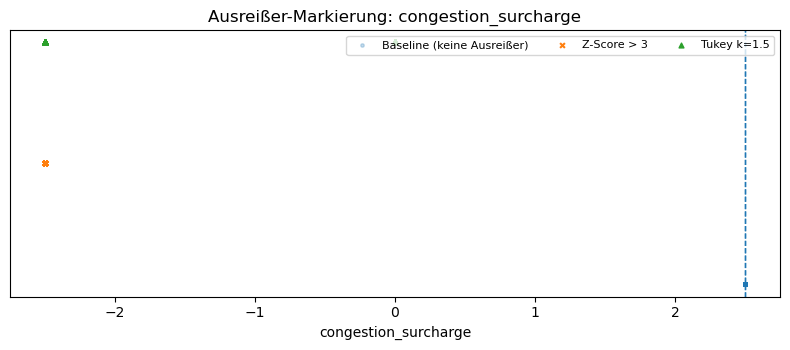

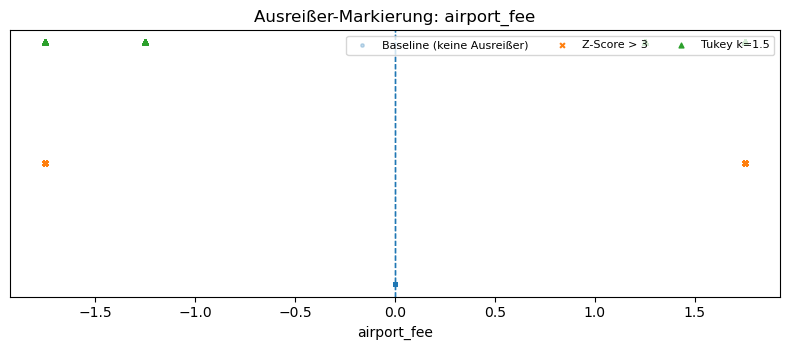

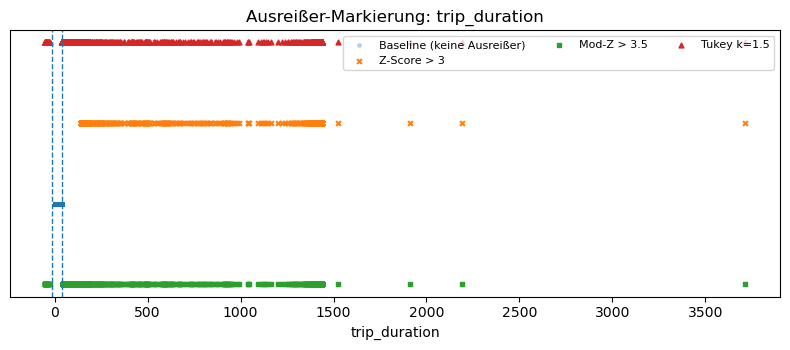

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


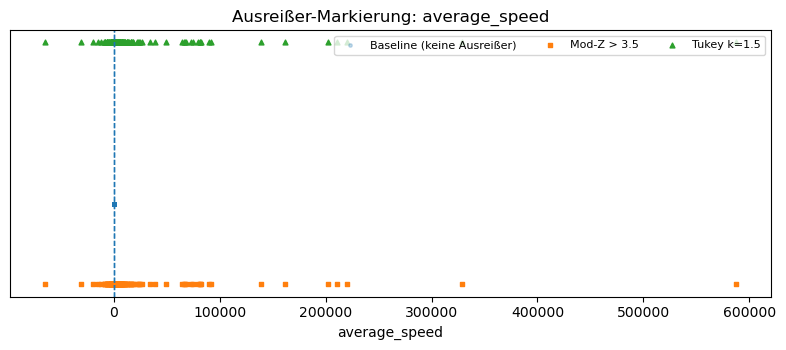

In [5]:
max_baseline_points = 40000  # anpassen bei Bedarf
for col in num_cols.columns:
    s = num_cols[col].astype(float)
    x = s.to_numpy(copy=True)

    # --- Masken berechnen (vektorisiert) ---
    # Klassischer Z-Score (NaNs ignorieren)
    z = zscore(x, nan_policy='omit')
    # Modified Z-Score (mit unskalierter MAD)
    med = np.nanmedian(x)
    mad = median_abs_deviation(x, scale=1.0, nan_policy='omit')  # unskaliert!
    modz = 0.6744897501960817 * (x - med) / (mad if mad != 0 else np.nan)

    # Tukey-Fences
    q1, q3 = np.nanpercentile(x, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    mask_z = np.abs(z) > 3
    mask_modz  = np.abs(modz) > 3.5
    mask_tukey = (x < lo) | (x > hi)

    # --- Basis-Rug/Scatter (ohne alles lahmzulegen) ---
    n = x.size
    idx_all = np.arange(n)

    mask_any = mask_z | mask_modz | mask_tukey
    non_out_idx = idx_all[~mask_any]

    if n > max_baseline_points and non_out_idx.size > max_baseline_points:
        rng = np.random.default_rng(42)
        baseline_idx = rng.choice(non_out_idx, size=max_baseline_points, replace=False)
    else:
        baseline_idx = non_out_idx

    # y-Achse ist nur eine "Jitter-Linie", damit man Punkte sieht
    y0 = np.zeros(n, dtype=float)

    plt.figure(figsize=(8, 3.6))
    # baseline
    if baseline_idx.size:
        plt.scatter(x[baseline_idx], y0[baseline_idx], s=6, alpha=0.25, label="Baseline (keine Ausreißer)")

    # Outlier-Layer (verschiedene Marker, kleine Offsets für bessere Lesbarkeit)
    if mask_z.any():
        plt.scatter(x[mask_z], y0[mask_z] + 0.06, s=12, marker='x', label=f"Z-Score > {3}")
    if mask_modz.any():
        plt.scatter(x[mask_modz], y0[mask_modz] - 0.06, s=12, marker='s', label=f"Mod-Z > {3.5}")
    if mask_tukey.any():
        plt.scatter(x[mask_tukey], y0[mask_tukey] + 0.12, s=12, marker='^', label=f"Tukey k={1.5}")

    # Tukey-Grenzen als Linien
    if np.isfinite(lo): plt.axvline(lo, linestyle='--', linewidth=1)
    if np.isfinite(hi): plt.axvline(hi, linestyle='--', linewidth=1)

    # Layout
    plt.yticks([])  # y-Achse ist nur Träger
    plt.xlabel(col)
    plt.title(f"Ausreißer-Markierung: {col}")
    plt.legend(loc="upper right", ncol=3, fontsize=8, frameon=True)
    plt.tight_layout()
    plt.show()

# 4. Verteilungsform (Histogramm + KDE)

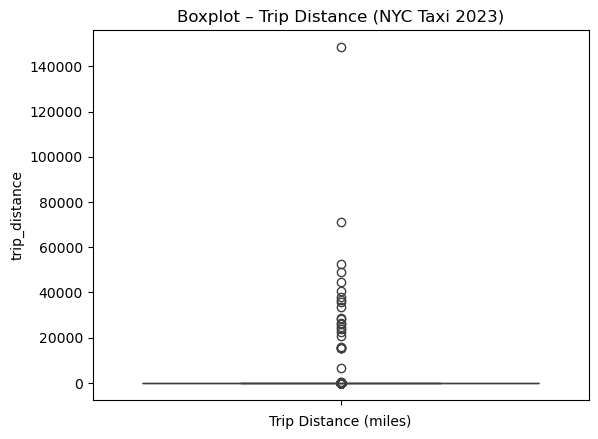

In [6]:
sns.boxplot(df["trip_distance"], whis=1.5)
plt.xlabel("Trip Distance (miles)")
plt.title("Boxplot – Trip Distance (NYC Taxi 2023)")
plt.show()

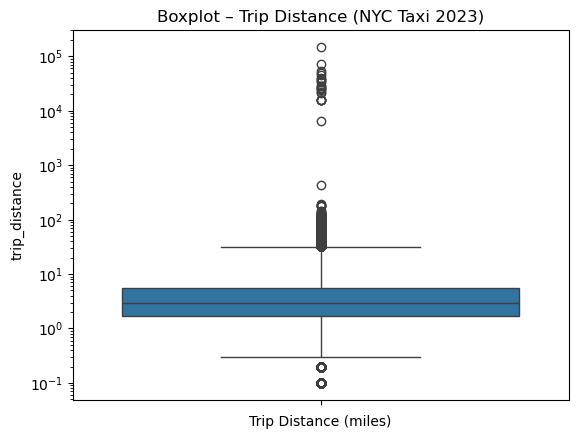

In [7]:
sns.boxplot(df["trip_distance"], whis=1.5, log_scale=True)
plt.xlabel("Trip Distance (miles)")
plt.title("Boxplot – Trip Distance (NYC Taxi 2023)")
plt.show()

This looks a bit nasty, since outliers will be handled in chapter 3 - so lets deactivate "fliers" for now:

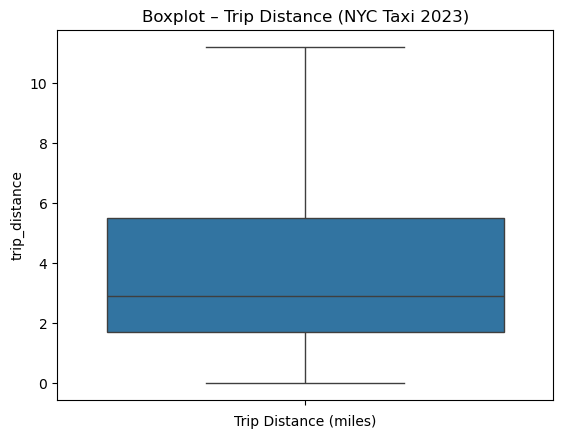

In [8]:
sns.boxplot(df["trip_distance"], whis=1.5, showfliers=False)
plt.xlabel("Trip Distance (miles)")
plt.title("Boxplot – Trip Distance (NYC Taxi 2023)")
plt.show()

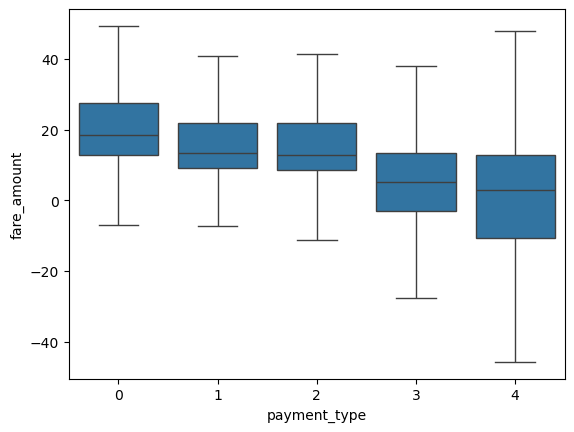

In [9]:
sns.boxplot(x="payment_type", y="fare_amount", data=df, whis=1.5, showfliers=False)
plt.show()

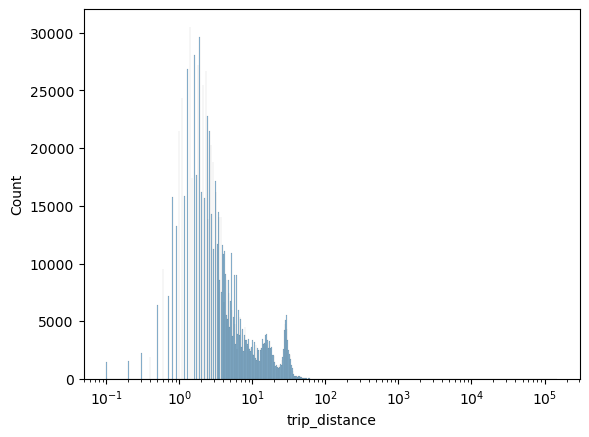

In [10]:
sns.histplot(df["trip_distance"], bins="fd", kde=True, log_scale=True)
plt.show()